# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
def fetch_movie_urls(url):                              #creating a custom function for soup making
    headers = {                                         #using header in def function to avoid non response from the website
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)       #requesting the response from the website
    if response.status_code != 200:                     #handling error in response
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)                              #calling the function for soup making
print(soup.prettify())                                  #prettifying the soup

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
movie_links = soup.find_all('a', href=True)                                       #finding all link in href using a tag
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]  #filtering the links in which /movie/ exists

url_list=[]
for x in movie_urls:                                                              #creating a list of url's
  url_list.append('https://www.justwatch.com'+x)                                  #appending all urls in movie_urls in the empty list
url_list

['https://www.justwatch.com/in/movie/kill-2024',
 'https://www.justwatch.com/in/movie/maharaja-2024',
 'https://www.justwatch.com/in/movie/munjha',
 'https://www.justwatch.com/in/movie/project-k',
 'https://www.justwatch.com/in/movie/deadpool-3',
 'https://www.justwatch.com/in/movie/aadujeevitham',
 'https://www.justwatch.com/in/movie/kingdom-of-the-planet-of-the-apes',
 'https://www.justwatch.com/in/movie/chandu-champion',
 'https://www.justwatch.com/in/movie/stree',
 'https://www.justwatch.com/in/movie/deadpool',
 'https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil',
 'https://www.justwatch.com/in/movie/agent',
 'https://www.justwatch.com/in/movie/stree-2',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/aavesham-2024',
 'https://www.justwatch.com/in/movie/bad-boys-4',
 'https://www.justwatch.com/in/movie/the-ministry-of-ungentlemanly-warfare',
 'https://www.justwatch.com/in/movie/the-fall-guy',
 'https://www.justwatch.com/in/m

## **Scrapping Movie Title**

In [ ]:
movie_title=soup.findAll("a",href=True)                                          #finding all link in href using a tag
title=[link["href"] for link in movie_title if "/movie/" in link["href"]]        #filtering the title from movie_title
title_lst=[]
for data in title:
  title_lst.append(data.split("/")[-1])                                          #appending the title in the empty list after spliting the movie title
title_lst


['kill-2024',
 'maharaja-2024',
 'munjha',
 'project-k',
 'deadpool-3',
 'aadujeevitham',
 'kingdom-of-the-planet-of-the-apes',
 'chandu-champion',
 'stree',
 'deadpool',
 'the-gangster-the-cop-the-devil',
 'agent',
 'stree-2',
 'dune-part-two',
 'aavesham-2024',
 'bad-boys-4',
 'the-ministry-of-ungentlemanly-warfare',
 'the-fall-guy',
 'indian-2',
 'bhaiyaaji',
 'phir-aayi-hasseen-dillruba',
 'laila-majnu',
 'harom-hara',
 'furiosa',
 '365-days',
 'ullozhukku',
 'family-star',
 'maharshi',
 'weapon-2024',
 'je-jatt-vigad-gya',
 'mr-and-mrs-mahi',
 'perfect-days',
 'kung-fu-panda-4',
 'a-quiet-place-day-one',
 'deadpool-2',
 'love-lies-bleeding-2024',
 'dune-2021',
 'salaar',
 'savi-a-bloody-housewife',
 'maharaj',
 'golam',
 'laapataa-ladies',
 'twisters',
 'oppenheimer',
 'manjummel-boys',
 'aattam',
 'godzilla-x-kong-the-new-empire',
 'the-unbearable-weight-of-massive-talent',
 'inside-out',
 'animal-2022',
 'hit-man',
 'siddharth-roy',
 'despicable-me-4-2024',
 'premalu',
 'chandni

## **Scrapping release Year**

In [ ]:
import time                               #importing time to stop my request for few seconds to handle response status code 429
release_years = []                        #creating empty list for release year
max_retries = 3                           #setting max retries to 3

for link in url_list:                     #looping through the url_list
  retries = 0                             #setting retries to 0 and value none if retries becomes zero
  release_year = None

  while retries < max_retries:            #while loop for retries
    soup1 = fetch_movie_urls(link)        #calling the function for soup making
    if isinstance(soup1, BeautifulSoup):  # Check if it's a BeautifulSoup object
      release_year_element = soup1.find("h1", class_="title-detail-hero__details__title")  #finding the release year
      if release_year_element:
        release_year = release_year_element.find('span', class_='release-year')
        if release_year:
          release_year = release_year.get_text(strip=True).strip("()")
          break
        else:
          release_year = None
      else:
        release_year = None
    else:
      print(f"Failed to fetch page for {link}: {soup1}") # Print error if not BeautifulSoup

    retries += 1                                          #incrementing retries by 1
    time.sleep(3)                                         #stopping the request for 3 seconds

  release_years.append(release_year)
release_years

Failed to fetch page for https://www.justwatch.com/in/movie/love-lies-bleeding-2024: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/dune-2021: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/salaar: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/savi-a-bloody-housewife: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/maharaj: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/golam: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/laapataa-ladies: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/twisters: ('Failed to retrieve the page, status code:', 429)


['2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2016',
 '2019',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2024',
 '2020',
 '2024',
 '2024',
 '2019',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2024',
 '2018',
 '2024',
 '2021',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2022',
 '2015',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2009',
 '2023',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2016',
 '2021',
 '2024',
 '2011',
 '2023',
 '2024',
 '2024',
 '2001',
 '2024',
 '2024',
 '2018',
 '2022',
 '2016',
 '2017',
 '2013',
 '2023',
 '2024',
 '2002',
 '2022',
 '2024',
 '2024',
 '2018',
 '2019',
 '2018',
 '2024',
 '2024',
 '2004',
 '2003',
 '2024',
 '2023',
 '2024',
 '2015',
 '2014',
 '2024',
 '2014',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024']

## **Scrapping Genres**

In [ ]:
import time                                      #importing time to stop my request for few seconds to handle response status code 429
movie_genre_list = []                             #creating empty list for movie genre
max_retries = 3                                   #setting max retries to 3

for link in url_list:                             #looping through the url_list
  retries = 0                                     #setting retries to 0 and value none if retries becomes zero
  genre_text = None

  while retries < max_retries:                    #while loop for retries
    soup = fetch_movie_urls(link)                 #calling the function for soup making
    soup2 = fetch_movie_urls(link)
    if isinstance(soup2, BeautifulSoup):
      h3_element = soup2.find('h3', class_='detail-infos__subheading', string='Genres')          #finding genre
      if h3_element:
        try:
          div_element = h3_element.find_next('div', class_='detail-infos__value')
          genre_text = div_element.find('span').text
          break  # Exit loop if successful
        except AttributeError:
          genre_text = None
      else:
        genre_text = None
    else:
      print(f"Failed to fetch page for {link}: {soup2}")              #show the request deny

    retries += 1                                                       #incrementing retries by 1
    time.sleep(3)                                                      #stopping the request for 3 seconds

  movie_genre_list.append(genre_text)

movie_genre_list

Failed to fetch page for https://www.justwatch.com/in/movie/kill-2024: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/deadpool-3: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/aadujeevitham: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/chandu-champion: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/chandu-champion: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/chandu-champion: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/stree: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil: ('Failed to retrieve the page, stat

['Action & Adventure, Crime, Drama, Mystery & Thriller',
 'Mystery & Thriller, Action & Adventure, Crime, Drama',
 'Comedy, Horror',
 'Drama, Fantasy, Science-Fiction, Mystery & Thriller, Action & Adventure',
 'Comedy, Science-Fiction, Action & Adventure',
 'Drama',
 'Science-Fiction, Action & Adventure, Mystery & Thriller, Drama',
 None,
 'Comedy, Horror, Drama',
 'Comedy, Action & Adventure',
 None,
 'Mystery & Thriller, Action & Adventure',
 'Comedy, Horror',
 'Science-Fiction, Action & Adventure, Drama',
 'Comedy, Action & Adventure',
 'Mystery & Thriller, Comedy, Action & Adventure, Crime',
 'War & Military, Action & Adventure, Comedy',
 'Drama, Romance, Action & Adventure, Comedy',
 'Drama, Mystery & Thriller, Action & Adventure',
 'Drama, Action & Adventure',
 'Mystery & Thriller, Romance, Crime, Drama',
 'Drama, Romance',
 'Action & Adventure, Crime, Drama',
 'Science-Fiction, Action & Adventure, Mystery & Thriller',
 'Drama, Romance, Made in Europe',
 'Drama',
 'Action & Adven

## **Scrapping IMBD Rating**

In [ ]:
import time                                                                                             #importing time to stop my request for few seconds to handle response status code 429

imdb_rt = []                                                                                             #creating empty list for imdb rating
max_retries = 3                                                                                           #setting max retries to 3

for link in url_list:                                                                                     #looping through the url_list
  retries = 0                                                                                             #setting retries to 0 and value none if retries becomes zero
  rating_text = None

  while retries < max_retries:                                                                             #while loop for retries
    soup = fetch_movie_urls(link)                                                                          #fetching soup
    if isinstance(soup, BeautifulSoup):                                                                    # Check if it's a BeautifulSoup object
      try:
        imdb_rt_element = soup.findAll("span", class_="imdb-score")                                          #finding imdb rating
        if imdb_rt_element:  # Check if any elements were found
          rating_text = imdb_rt_element[0].text.strip()  # Extract from the first element
          break
      except AttributeError:                                                                               #if error occurs
        rating_text = None
    else:
      print(f"Failed to fetch page for {link}: {soup}")                                                      # Print error if not BeautifulSoup

    retries += 1                                                                                             #incrementing retries by 1
    time.sleep(3)                                                                                            #stopping the request for 3 seconds

  imdb_rt.append(rating_text)

imdb_rt

Failed to fetch page for https://www.justwatch.com/in/movie/chandu-champion: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/deadpool: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/agent: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/dune-part-two: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/aavesham-2024: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/bad-boys-4: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/indian-2: ('Failed to retrieve the page, status code:',

['7.7 (19k)',
 '8.6 (37k)',
 '7.2 (15k)',
 '7.6 (43k)',
 '8.0 (224k)',
 '8.0 (14k)',
 '7.0 (104k)',
 '8.0 (28k)',
 '7.5 (40k)',
 '8.0 (1m)',
 '6.9 (25k)',
 '4.2 (1.5k)',
 '8.0 (8.3k)',
 '8.5 (497k)',
 '7.9 (18k)',
 '6.7 (57k)',
 '6.8 (84k)',
 '6.9 (129k)',
 '4.2 (14k)',
 '5.1 (6.8k)',
 '5.8 (3.8k)',
 '7.7 (5.6k)',
 '8.0 (2.8k)',
 '7.6 (161k)',
 '3.3 (100k)',
 '7.6 (939)',
 '5.3 (4.5k)',
 '7.2 (10k)',
 '6.9 (5.4k)',
 '4.6 (492)',
 '6.1 (15k)',
 '7.9 (54k)',
 '6.3 (51k)',
 '6.4 (75k)',
 '7.6 (674k)',
 '6.7 (39k)',
 '8.0 (896k)',
 '6.5 (68k)',
 '6.8 (33k)',
 '6.5 (11k)',
 '7.2 (2.2k)',
 '8.4 (39k)',
 '6.8 (67k)',
 '8.3 (783k)',
 '8.3 (20k)',
 '8.2 (3k)',
 '6.1 (98k)',
 '7.0 (158k)',
 '8.1 (820k)',
 '6.2 (96k)',
 '6.9 (79k)',
 '7.4 (2k)',
 '6.2 (30k)',
 '7.8 (14k)',
 '4.3 (9.6k)',
 '8.9 (126k)',
 '6.9 (3.3k)',
 '7.7 (18k)',
 '7.8 (99k)',
 '5.1 (1.8k)',
 '6.1 (68k)',
 '7.2 (2.3k)',
 '7.5 (11k)',
 '7.1 (48k)',
 '6.9',
 '8.3 (215k)',
 '6.9 (32k)',
 '7.1 (148k)',
 '7.8 (50k)',
 '6.7 (138k)',
 

## **Scrapping Runtime/Duration**

In [ ]:
import time                                                                #importing time to stop my request for few seconds to handle response status code 429
runtime_list = []                                                            #creating empty list for runtime
max_retries = 3                                                              #setting max retries to 3

for link in url_list:                                                        #looping through the url_list
  retries = 0                                                                 #setting retries to 0 and value none if retries becomes zero
  runtime_element = None

  while retries < max_retries:                                                #while loop for retries
    soup = fetch_movie_urls(link)                                            #fetching soup
    if isinstance(soup, BeautifulSoup):                                      # Check if it's a BeautifulSoup object
      try:
        h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')  #finding runtime
        if h3_element:
          runtime_element = h3_element.find_next("div", class_="detail-infos__value").text.strip()
          break  # Exit the loop if successful
        else:                                                                #if error occurs
          runtime_element = None
      except AttributeError:                                                 #if error occurs
        runtime_element = None
    else:
      print(f"Failed to fetch page for {link}: {soup}")                      # Print error if not BeautifulSoup

    retries += 1                                                              #incrementing retries by 1
    time.sleep(3)                                                             #stopping the request for 3 seconds

  runtime_list.append(runtime_element)

runtime_list

Failed to fetch page for https://www.justwatch.com/in/movie/dune-part-two: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/the-ministry-of-ungentlemanly-warfare: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/laila-majnu: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/furiosa: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/ullozhukku: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/maharshi: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/weapon-2024: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/movie/deadpool-2: ('Failed to retrieve the page, status co

['1h 45min',
 '2h 30min',
 '2h 3min',
 '3h 1min',
 '2h 8min',
 '2h 0min',
 '2h 25min',
 '2h 22min',
 '2h 7min',
 '1h 48min',
 '1h 50min',
 '2h 34min',
 '2h 27min',
 '2h 47min',
 '2h 38min',
 '1h 55min',
 '2h 2min',
 '2h 6min',
 '3h 0min',
 '2h 30min',
 '2h 13min',
 '2h 19min',
 '2h 34min',
 '2h 28min',
 '1h 54min',
 '2h 3min',
 '2h 39min',
 '2h 56min',
 '2h 0min',
 '2h 12min',
 '2h 19min',
 '2h 4min',
 '1h 34min',
 '1h 39min',
 '1h 59min',
 '1h 44min',
 '2h 35min',
 '2h 55min',
 '2h 3min',
 '2h 12min',
 '2h 0min',
 '2h 2min',
 '2h 3min',
 '3h 0min',
 '2h 15min',
 '2h 19min',
 '1h 55min',
 '1h 47min',
 '1h 35min',
 '3h 24min',
 '1h 56min',
 '2h 28min',
 '1h 34min',
 '2h 36min',
 '2h 34min',
 '2h 26min',
 '2h 25min',
 '2h 30min',
 '1h 37min',
 '2h 28min',
 '1h 55min',
 '2h 13min',
 '2h 14min',
 '1h 41min',
 '2h 11min',
 '2h 41min',
 '2h 15min',
 '1h 49min',
 '2h 39min',
 '2h 37min',
 '2h 39min',
 '2h 30min',
 '2h 32min',
 '2h 20min',
 '3h 1min',
 '1h 53min',
 '2h 36min',
 '2h 50min',
 '2

## **Scrapping Age Rating**

In [ ]:
import time                                                               #importing time to stop my request for few seconds to handle response status code 429
age_rt = []                                                               #creating empty list for age rating
max_retries = 3                                                           #setting max retries to 3

for link in url_list:                                                      #looping through the url_list
  retries = 0                                                              #setting retries to 0 and value none if retries becomes zero
  age_rt_element = None                                                    #creating empty list for age rating

  while retries < max_retries:                                              #while loop for retries
    soup = fetch_movie_urls(link)                                          #fetching soup
    if isinstance(soup, BeautifulSoup):                                    # Check if it's a BeautifulSoup object
      try:                                                                #try block for error handling
        h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')
        age_rt_element = h3_element.find_next_sibling('div', class_='detail-infos__value').text.strip()
        break                                                              # Exit loop if successful
      except AttributeError:
        age_rt_element = None
    else:
      print(f"Failed to fetch page for: {link}:{soup}")  # Print only the link

    retries += 1
    time.sleep(3)

  age_rt.append(age_rt_element)

age_rt

['A',
 None,
 None,
 'UA',
 'A',
 'UA',
 None,
 'UA',
 'UA',
 'A',
 None,
 'UA',
 'UA',
 None,
 None,
 None,
 None,
 'UA',
 'UA',
 None,
 None,
 'UA',
 'A',
 'A',
 None,
 'U',
 None,
 'UA',
 'UA',
 None,
 'U',
 None,
 'U',
 None,
 'A',
 None,
 'UA',
 'A',
 'UA',
 None,
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 'U',
 'A',
 'A',
 'A',
 None,
 'U',
 'U',
 None,
 'A',
 'UA',
 'U',
 None,
 None,
 'UA',
 'U',
 'A',
 'A',
 'U',
 None,
 None,
 'UA',
 None,
 'UA',
 'UA',
 'U',
 'UA',
 None,
 'A',
 'UA',
 'UA',
 'A',
 'A',
 'UA',
 'UA',
 'U',
 'UA',
 'UA',
 None,
 'UA',
 'A',
 'A',
 'UA',
 None,
 'A',
 'UA',
 None,
 'UA',
 'UA',
 'A',
 None,
 None,
 'A',
 'A',
 None,
 None,
 'UA',
 'A',
 None,
 None,
 None,
 None,
 None]

## **Fetching Production Countries Details**

In [ ]:
import time                                                              #importing time to stop my request for few seconds to handle response status code 429
country_list = []                                                          #creating empty list for country
max_retries = 3                                                            #setting max retries to 3

for link in url_list:                                                      #looping through the url_list
  retries = 0                                                               #setting retries to 0 and value none if retries becomes zero
  elements = None

  while retries < max_retries:                                              #while loop for retries
    soup = fetch_movie_urls(link)                                          #fetching soup
    if isinstance(soup, BeautifulSoup):                                    # Check if it's a BeautifulSoup object
      h3_element = soup.find('h3', class_='detail-infos__subheading', string=lambda text: 'Production country' in text)
      if h3_element:
        try:
          elements = h3_element.find_next_sibling('div', class_='detail-infos__value').text.strip()
          break  # Exit loop if successful
        except AttributeError:                                                #handling error
          elements = None
      else:
        elements = None
    else:
      print(f"Failed to fetch page for: {link}")                              # Print error if not BeautifulSoup

    retries += 1                                                              #incrementing retries by 1
    time.sleep(3)                                                             #stopping the request for 3 seconds

  country_list.append(elements)

country_list

['United States, India',
 'India',
 'India',
 'India',
 'United States',
 'India, United States',
 'United States',
 'India',
 'India',
 'United States',
 'South Korea',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'United States, United Kingdom, Turkey',
 'Australia, Canada, United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States, Australia',
 'Poland',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'Germany, Japan',
 'United States',
 'Canada, United States, United Kingdom',
 'United States',
 'United Kingdom, United States',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'United Kingdom, United States',
 'India',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'Thailand, China, India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'United States, Cana

## **Fetching Streaming Service Details**

In [ ]:
import time                                                              #importing time to stop my request for few seconds to handle response status code 429
import re                                                               #importing re to handle regular expression
from urllib.parse import unquote                                          #importing unquote to handle url to be used in another cell

service_list = []                                                          #creating empty list for service
max_retries = 3                                                            #setting max retries to 3

for link in url_list:                                                      #looping through the url_list
  retries = 0                                                               #setting retries to 0 and value none if retries becomes zero
  data1 = None                                                              #creating empty list for service

  while retries < max_retries:                                              #while loop for retries
    soup = fetch_movie_urls(link)                                          #fetching soup
    if isinstance(soup, BeautifulSoup):                                    # Check if it's a BeautifulSoup object
      try:                                                                #try block for error handling
        data = soup.findAll("a", class_="offer", href=True)
        data1 = [item["href"] for item in data]
        break  # Exit loop if successful
      except AttributeError:
        data1 = None
    else:
      print(f"Failed to fetch page for: {link}")                          # Print error if not BeautifulSoup

    retries += 1                                                              #incrementing retries by 1
    time.sleep(3)                                                         #stopping the request for 3 seconds

  service_list.append(data1)

Failed to fetch page for: https://www.justwatch.com/in/movie/haseen-dillruba
Failed to fetch page for: https://www.justwatch.com/in/movie/logan
Failed to fetch page for: https://www.justwatch.com/in/movie/vikram-2021
Failed to fetch page for: https://www.justwatch.com/in/movie/exhuma
Failed to fetch page for: https://www.justwatch.com/in/movie/memories-of-murder
Failed to fetch page for: https://www.justwatch.com/in/movie/memories-of-murder
Failed to fetch page for: https://www.justwatch.com/in/movie/apollo-13-survival


In [ ]:
import re                                                              #importing re to handle regular expression
from urllib.parse import unquote

def extract_streaming_services(urls_list):                                #function for extracting streaming services
  """
  This function extracts streaming services like Netflix, Hotstar, etc. from a list of URLs using regex.

  Args:
    urls_list (list): A list of lists of URLs to extract streaming services from.

  Returns:
    list: A list of lists of extracted streaming services. Each inner list corresponds to an item in urls_list
           and contains all the streaming services found in that item's URLs. Empty lists are replaced with None.
  """
  services = []                                                           #creating empty list for service
  pattern = r'//(?:www\.)?([a-z0-9]+)\.com'                               #regular expression for extracting streaming services
  for url_list in urls_list:                                                #looping through the url_list
    item_services = []                                                      #creating empty list for service
    if url_list is None:                                                    #if url_list is none
      services.append(None)                                                 #append none in services
    else:                                                                  #if url_list is not none
      for url in url_list:                                                  #looping through the url_list
        decoded_url = unquote(url)                                         #decoding the url
        match = re.search(pattern, decoded_url)                           #searching the pattern in the decoded_url
        if match:                                                         #if match found
          service = match.group(1)                                        #appending the service in the empty list
          item_services.append(service)                                   #appending the service in the empty list
      # Replace empty item_services with None
      services.append(item_services if item_services else None)

  return services                                                         #returning the services


services = extract_streaming_services(service_list)                        #calling the function for extracting streaming services
services

[None,
 ['netflix'],
 None,
 None,
 None,
 ['netflix'],
 ['hotstar'],
 None,
 ['hotstar'],
 ['hotstar'],
 None,
 None,
 None,
 ['jiocinema'],
 ['hotstar'],
 ['zee5'],
 None,
 ['zee5'],
 ['netflix'],
 ['zee5'],
 ['netflix'],
 ['zee5'],
 ['jiocinema'],
 None,
 ['netflix'],
 None,
 ['jiocinema'],
 ['hotstar'],
 None,
 None,
 ['netflix'],
 ['mubi'],
 ['jiocinema', 'zee5'],
 None,
 ['hotstar'],
 None,
 ['netflix'],
 ['hotstar', 'netflix'],
 ['netflix'],
 ['netflix'],
 None,
 ['netflix'],
 None,
 ['jiocinema', 'jiocinema', 'zee5', 'hungama'],
 ['hotstar'],
 None,
 None,
 ['lionsgateplay', 'netflix'],
 ['hotstar'],
 ['netflix'],
 ['netflix'],
 None,
 ['zee5'],
 ['hotstar'],
 None,
 ['hotstar'],
 None,
 ['zee5'],
 None,
 ['hotstar'],
 ['netflix', 'zee5'],
 None,
 ['netflix'],
 None,
 None,
 None,
 ['netflix'],
 None,
 ['jiocinema', 'zee5', 'jiocinema'],
 None,
 ['jiocinema', 'zee5', 'hotstar', 'jiocinema'],
 None,
 ['jiocinema'],
 None,
 None,
 None,
 ['jiocinema', 'jiocinema'],
 None,
 ['hots

## **Now Creating Movies DataFrame**

In [ ]:
len(title_lst),len(url_list),len(release_years),len(movie_genre_list),len(imdb_rt),len(runtime_list),len(age_rt),len(country_list),len(services)

(110, 110, 110, 110, 110, 110, 110, 110, 110)

In [ ]:
# Write Your Code here
movies_df=pd.DataFrame({                                        #creating movies dataframe
    "Title":title_lst,
    "URL":url_list,
    "Release Year":release_years,
    "Genre":movie_genre_list,
    "IMDB Rating":imdb_rt,
    "Runtime":runtime_list,
    "Age Rating":age_rt,
    "Production Country":country_list,
    "Streaming Service":services
})
movies_df


,Title,URL,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Service
0,kill-2024,https://www.justwatch.com/in/movie/kill-2024,2024,"Action & Adventure, Crime, Drama, Mystery & Th...",7.7 (19k),1h 45min,A,"United States, India",None
1,maharaja-2024,https://www.justwatch.com/in/movie/maharaja-2024,2024,"Mystery & Thriller, Action & Adventure, Crime,...",8.6 (37k),2h 30min,None,India,[jiocinema]
2,munjha,https://www.justwatch.com/in/movie/munjha,2024,"Comedy, Horror",7.2 (15k),2h 3min,None,India,None
3,project-k,https://www.justwatch.com/in/movie/project-k,2024,"Drama, Fantasy, Science-Fiction, Mystery & Thr...",7.6 (43k),3h 1min,UA,India,[netflix]
4,deadpool-3,https://www.justwatch.com/in/movie/deadpool-3,2024,"Comedy, Science-Fiction, Action & Adventure",8.0 (224k),2h 8min,A,United States,None
...,...,...,...,...,...,...,...,...,...
105,untold-the-murder-of-air-mcnair,https://www.justwatch.com/in/movie/untold-the-...,2024,"Documentary, Sport",None,57min,None,None,None
106,nice-girls,https://www.justwatch.com/in/movie/nice-girls,2024,"Crime, Comedy, Action & Adventure",None,1h 30min,None,France,None
107,secret-lives-of-orangutans,https://www.justwatch.com/in/movie/secret-live...,2024,None,None,1h 18min,None,United Kingdom,None
108,adam-sandler-love-you,https://www.justwatch.com/in/movie/adam-sandle...,2024,Comedy,None,1h 14min,None,United States,None


In [ ]:
movies_df.isnull().sum()                                     #checking for null values

,0
Title,0
URL,0
Release Year,0
Genre,13
IMDB Rating,7
Runtime,0
Age Rating,37
Production Country,1
Streaming Service,48


In [ ]:
import re

# to get the only the rating and removing the no. of reviewers from imdb rating
movies_df['IMDB Rating'] = movies_df['IMDB Rating'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0] if isinstance(x, str) else x)

# Convert the column to numeric type
movies_df['IMDB Rating'] = pd.to_numeric(movies_df['IMDB Rating'], errors='coerce')
movies_df['Release Year']=pd.to_numeric(movies_df['Release Year'],errors='coerce')
movies_df

,Title,URL,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Service
0,kill-2024,https://www.justwatch.com/in/movie/kill-2024,2024,"Action & Adventure, Crime, Drama, Mystery & Th...",7.7,1h 45min,A,"United States, India",None
1,maharaja-2024,https://www.justwatch.com/in/movie/maharaja-2024,2024,"Mystery & Thriller, Action & Adventure, Crime,...",8.6,2h 30min,None,India,[jiocinema]
2,munjha,https://www.justwatch.com/in/movie/munjha,2024,"Comedy, Horror",7.2,2h 3min,None,India,None
3,project-k,https://www.justwatch.com/in/movie/project-k,2024,"Drama, Fantasy, Science-Fiction, Mystery & Thr...",7.6,3h 1min,UA,India,[netflix]
4,deadpool-3,https://www.justwatch.com/in/movie/deadpool-3,2024,"Comedy, Science-Fiction, Action & Adventure",8.0,2h 8min,A,United States,None
...,...,...,...,...,...,...,...,...,...
105,untold-the-murder-of-air-mcnair,https://www.justwatch.com/in/movie/untold-the-...,2024,"Documentary, Sport",NaN,57min,None,None,None
106,nice-girls,https://www.justwatch.com/in/movie/nice-girls,2024,"Crime, Comedy, Action & Adventure",NaN,1h 30min,None,France,None
107,secret-lives-of-orangutans,https://www.justwatch.com/in/movie/secret-live...,2024,None,NaN,1h 18min,None,United Kingdom,None
108,adam-sandler-love-you,https://www.justwatch.com/in/movie/adam-sandle...,2024,Comedy,NaN,1h 14min,None,United States,None


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=fetch_movie_urls(tv_url)
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
url_tv_show_list=[]                                                              #creating empty list for tv show url
show_url_data=soup.find_all('a',href=True)                                      #finding all link in href using a tag
show_url=[link['href'] for link in show_url_data if '/tv-show/' in link['href']]  #filtering the links in which /tv-show/ exists
for data in show_url:                                                           #looping through the show_url
  url_tv_show_list.append('https://www.justwatch.com'+data)                    #appending all urls in show_url in the empty list
url_tv_show_list



['https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/house-of-the-dragon',
 'https://www.justwatch.com/in/tv-show/the-boys',
 'https://www.justwatch.com/in/tv-show/sweet-home',
 'https://www.justwatch.com/in/tv-show/adams-sweet-agony',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/gyaarah-gyaarah',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-topper',
 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored',
 'https://www.justwatch.com/in/tv-show/batman-caped-crusader',
 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba',
 'https://www.justwatch.com/in/tv-show/presumed-innocent',
 'https://www.justwatch.com/in/tv-show/elite',
 'https://www.justwatch.com/in/tv-show

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
title_tv_show_list=[]                                                              #creating empty list for tv show title
show_title_data=soup.findAll('a',href=True)                                       #finding all link in href using a tag
show_title=[link['href'] for link in show_title_data if '/tv-show/' in link['href']]  #filtering the title from show_title
for data in show_title:                                                           #looping through the show_title
  title_tv_show_list.append(data.split("/")[-1])                                 #appending the title in the empty list after spliting the show_title
title_tv_show_list


['mirzapur',
 'house-of-the-dragon',
 'the-boys',
 'sweet-home',
 'adams-sweet-agony',
 'panchayat',
 'game-of-thrones',
 'apharan',
 'gyaarah-gyaarah',
 'shogun-2024',
 'attack-on-titan',
 'tribhuvan-mishra-ca-topper',
 'x-x-x-uncensored',
 'batman-caped-crusader',
 'demon-slayer-kimetsu-no-yaiba',
 'presumed-innocent',
 'elite',
 'the-bear',
 'y-the-last-man',
 'shahmaran',
 'mastram',
 'mad-men',
 'paperhouse',
 'bigg-boss-ott',
 'the-umbrella-academy',
 'asur',
 'gullak',
 'bigg-boss',
 'shekhar-home',
 'aashram',
 'breaking-bad',
 'farzi',
 'unsolved-mysteries-2020',
 'a-good-girls-guide-to-murder',
 'stranger-things',
 'the-rookie',
 'the-family-man',
 'college-romance',
 'evil',
 'those-about-to-die',
 'dark',
 'kota-factory',
 'scam-1992',
 'cobra-kai',
 'raising-voices',
 'fallout',
 'you',
 'tulsa-king',
 'gandii-baat',
 'the-flash',
 '3-body-problem',
 'naruto-shippuden',
 'mtv-splitsvilla',
 'dark-matter-2024',
 'peaky-blinders',
 'jujutsu-kaisen',
 'true-detective',
 'how-

## **Fetching Release Year**

In [ ]:
# Write Your Code here
import time                                                              #importing time to stop my request for few seconds to handle response status code 429
release_years = []                                                        #creating empty list for release year
max_retries = 3                                                           #setting max retries to 3

show_r_year_list=[]                                                       #creating empty list for release year
for link in url_tv_show_list:                                             #looping through the url_list
  retries = 0                                                              #setting retries to 0 and value none if retries becomes zero
  release_year = None                                                      #creating empty list for release year
  while retries < max_retries:                                              #while loop for retries
    soup1 = fetch_movie_urls(link)
    if isinstance(soup1, BeautifulSoup):  # Check if it's a BeautifulSoup object
      release_year_s_element = soup1.find("h1", class_="title-detail-hero__details__title")
      if release_year_s_element:
        release_year_s = release_year_s_element.find('span', class_='release-year')
        if release_year_s:
          release_year_s = release_year_s.get_text(strip=True).strip("()")
          break                                                                              # Exit loop if successful
        else:
          release_year = None                                                                #creating empty list for release year
      else:
        release_year = None                                                                #creating empty list for release year
    else:
      print(f"Failed to fetch page for {link}: {soup1}") # Print error if not BeautifulSoup

    retries += 1                                                              #incrementing retries by 1
    time.sleep(3)                                                              #stopping the request for 3 seconds

  show_r_year_list.append(release_year_s)                                      #appending the release year in the empty list
show_r_year_list


Failed to fetch page for https://www.justwatch.com/in/tv-show/college-romance: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/evil: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/those-about-to-die: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/dark: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/dark: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/kota-factory: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/scam-1992: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/raising-voices: ('Failed to retrieve the page, status code:', 429)


['2018',
 '2022',
 '2019',
 '2020',
 '2024',
 '2020',
 '2011',
 '2018',
 '2024',
 '2024',
 '2013',
 '2024',
 '2018',
 '2024',
 '2019',
 '2024',
 '2018',
 '2022',
 '2021',
 '2023',
 '2020',
 '2007',
 '2017',
 '2021',
 '2019',
 '2020',
 '2019',
 '2006',
 '2024',
 '2020',
 '2008',
 '2023',
 '2020',
 '2024',
 '2016',
 '2018',
 '2019',
 '2018',
 '2019',
 '2024',
 '2017',
 '2019',
 '2020',
 '2018',
 '2024',
 '2024',
 '2018',
 '2022',
 '2018',
 '2014',
 '2024',
 '2007',
 '2008',
 '2024',
 '2013',
 '2020',
 '2014',
 '2005',
 '2002',
 '2016',
 '2022',
 '2010',
 '2017',
 '2021',
 '2023',
 '2010',
 '2024',
 '2020',
 '2011',
 '2024',
 '2024',
 '2005',
 '2017',
 '2010',
 '2004',
 '2022',
 '2013',
 '2021',
 '2022',
 '2009',
 '2020',
 '2018',
 '2022',
 '2004',
 '2020',
 '2019',
 '2019',
 '2023',
 '2024',
 '2014',
 '2021',
 '2023',
 '2019',
 '2013',
 '2020',
 '2019',
 '2024',
 '2024',
 '2023',
 '2021',
 '2018',
 '2022',
 '2019',
 '2020',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024']

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
import time                                                              #importing time to stop my request for few seconds to handle response status code 429
show_genre_list = []                                                      #creating empty list for genre
max_retries = 3                                                           #setting max retries to 3
for link in url_tv_show_list:                                             #looping through the url_list
  retries = 0                                                              #setting retries to 0 and value none if retries becomes zero
  genre_text = None  # Initialize as None
  while retries < max_retries:                                              #while loop for retries
    soup2 = fetch_movie_urls(link)                                           #fetching soup
    if isinstance(soup2, BeautifulSoup):                                    # Check if it's a BeautifulSoup object
      h3_element_s = soup2.find('h3', class_='detail-infos__subheading', string='Genres')
      if h3_element_s:
        try:
          genre_text_s = h3_element_s.find_next('div', class_='detail-infos__value')
          genre_text_s = genre_text_s.find('span').text
          break  # Exit loop if successful
        except AttributeError:                                              #if error occurs
          genre_text = None                                                 #creating empty list for genre
      else:                                                              #if error occurs
        genre_text_s = None
    else:
      print(f"Failed to fetch page for {link}: {soup2}")                 # Print error if not BeautifulSoup

    retries += 1                                                              #incrementing retries by 1
    time.sleep(3)                                                             #stopping the request for 3 seconds

  show_genre_list.append(genre_text_s)                                     #appending the genre in the empty list
show_genre_list



Failed to fetch page for https://www.justwatch.com/in/tv-show/mirzapur: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/house-of-the-dragon: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/the-boys: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/adams-sweet-agony: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/panchayat: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/game-of-thrones: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/apharan: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/gyaarah-gyaarah: ('Failed to retrieve the page, st

['Action & Adventure, Drama, Crime, Mystery & Thriller',
 'Drama, Action & Adventure, Science-Fiction, Fantasy, Romance',
 'Science-Fiction, Action & Adventure, Comedy, Crime, Drama',
 'Science-Fiction, Mystery & Thriller, Drama, Fantasy, Horror',
 'Animation',
 'Drama, Comedy',
 'Drama, Action & Adventure, Science-Fiction, Fantasy',
 'Drama, Action & Adventure, Crime, Mystery & Thriller',
 'Fantasy, Drama, Science-Fiction',
 'Drama, War & Military, History',
 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction',
 'Comedy, Crime, Drama, Mystery & Thriller',
 'Comedy, Drama, Romance',
 'Action & Adventure, Science-Fiction, Animation, Crime, Kids & Family, Fantasy',
 'Science-Fiction, Animation, Action & Adventure, Mystery & Thriller, Fantasy',
 'Crime, Drama',
 'Drama, Mystery & Thriller, Crime',
 'Comedy, Drama',
 'Science-Fiction, Drama, Action & Adventure',
 'Science-Fiction, Mystery & Thriller, Action & Adventure, Drama, Romance, Fantasy',
 'Drama, Fantasy, Comed

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
import time                                                              #importing time to stop my request for few seconds to handle response status code 429
s_imdb_r_list = []                                                       #creating empty list for imdb rating
max_retries = 3                                                           #setting max retries to 3
for link in url_tv_show_list:                                            #looping through the url_list
  retries = 0                                                              #setting retries to 0 and value none if retries becomes zero
  rating_text = None
  while retries < max_retries:                                            #while loop for retries
    soup = fetch_movie_urls(link)                                         #fetching soup
    if isinstance(soup, BeautifulSoup):                                   # Check if it's a BeautifulSoup object
      try:                                                              #try block for error handling
        s_rt_data=soup.findAll("span", class_="imdb-score")
        if s_rt_data:  # Check if any elements were found
          rating_text = s_rt_data[0].text.strip()
          break
          # Exit the loop if successful
      except AttributeError:                                             #if error occurs
        rating_text = None
    else:
      print(f"Failed to fetch page for {link}: {soup}")                  # Print error if not BeautifulSoup

    retries += 1                                                           #incrementing retries by 1
    time.sleep(3)                                                          #stopping the request for 3 seconds

  s_imdb_r_list.append(rating_text)                                     #appending the imdb rating in the empty list
s_imdb_r_list



Failed to fetch page for https://www.justwatch.com/in/tv-show/mirzapur: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/shogun-2024: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/attack-on-titan: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/x-x-x-uncensored: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/batman-caped-crusader: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/presumed-innocent: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/the-bear: ('Fail

['8.4 (87k)',
 '8.4 (435k)',
 '8.7 (711k)',
 '7.3 (34k)',
 None,
 '9.0 (96k)',
 '9.2 (2m)',
 '8.2 (20k)',
 '8.3 (2.1k)',
 '8.7 (163k)',
 '9.1 (536k)',
 '7.0 (2.1k)',
 '4.8 (798)',
 '7.3 (9k)',
 '8.6 (162k)',
 '7.7 (40k)',
 '7.2 (93k)',
 '8.6 (238k)',
 '6.0 (16k)',
 '5.3 (12k)',
 '6.9 (2.5k)',
 '8.7 (264k)',
 '8.2 (543k)',
 '1.9 (1.2k)',
 '7.9 (285k)',
 '8.5 (67k)',
 '9.1 (24k)',
 '3.6 (4.1k)',
 '8.4 (4.3k)',
 '6.6 (58k)',
 '9.5 (2m)',
 '8.4 (47k)',
 '7.3 (13k)',
 '6.8 (9.6k)',
 '8.7 (1m)',
 '8.0 (80k)',
 '8.7 (100k)',
 '8.3 (29k)',
 '7.8 (40k)',
 '6.6 (12k)',
 '8.7 (457k)',
 '9.0 (85k)',
 '9.2 (159k)',
 '8.5 (211k)',
 '7.2 (3.9k)',
 '8.4 (242k)',
 '7.7 (307k)',
 '8.0 (75k)',
 '3.4 (3k)',
 '7.5 (371k)',
 '7.5 (137k)',
 '8.7 (177k)',
 '3.9 (606)',
 '7.7 (38k)',
 '8.8 (667k)',
 '8.6 (127k)',
 '8.9 (667k)',
 '8.3 (738k)',
 '8.4 (132k)',
 '8.5 (538k)',
 '7.7 (17k)',
 '8.1 (1m)',
 '8.0 (118k)',
 '8.2 (53k)',
 '8.7 (556k)',
 '9.1 (1m)',
 '6.3 (5.4k)',
 '6.9 (120k)',
 '8.5 (192k)',
 '6.2 (171)

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
s_age_rt_list = []                                                       #creating empty list for age rating
max_retries = 3                                                          #setting max retries to 3
for link in url_tv_show_list:                                            #looping through the url_list
  retries = 0                                                              #setting retries to 0 and value none if retries becomes zero
  age_rt_element = None
  while retries < max_retries:                                            #while loop for retries
    soup = fetch_movie_urls(link)                                         #fetching soup
    if isinstance(soup, BeautifulSoup):                                   # Check if it's a BeautifulSoup object
      try:                                                              #try block for error handling
        h3_element_s = soup.find('h3', class_='detail-infos__subheading', string='Age rating')
        s_age_rt_element = h3_element_s.find_next_sibling('div', class_='detail-infos__value').text.strip()
        break
      except AttributeError:
        s_age_rt_element = None
    else:
      print(f"Failed to fetch page for: {link}")                         # Print error if not BeautifulSoup

    retries += 1                                                           #incrementing retries by 1
    time.sleep(3)                                                          #stopping the request for 3 seconds
  s_age_rt_list.append(s_age_rt_element)                                 #appending the age rating in the empty list
s_age_rt_list



['A',
 'A',
 'A',
 'A',
 None,
 None,
 'U',
 None,
 'A',
 None,
 'UA',
 None,
 None,
 None,
 None,
 None,
 'A',
 None,
 'A',
 None,
 None,
 'U',
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 None,
 'U',
 None,
 None,
 None,
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 'A',
 None,
 'A',
 'A',
 None,
 'A',
 None,
 'A',
 'U',
 'U',
 'A',
 'A',
 None,
 'U',
 'U',
 None,
 'A',
 None,
 'U',
 'U',
 None,
 'A',
 'U',
 None,
 None,
 'U',
 None,
 None,
 'U',
 None,
 None,
 'U',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'A',
 'U',
 'A',
 'A',
 None,
 None,
 None,
 'U',
 'UA',
 None,
 'A',
 'U',
 'A',
 None,
 None,
 'A',
 None,
 None,
 'A',
 'A',
 'A',
 'A',
 None,
 None,
 None,
 None,
 None,
 None]

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
s_country_list = []                                                       #creating empty list for country
max_retries = 3                                                           #setting max retries to 3
for link in url_tv_show_list:                                             #looping through the url_list
  retries = 0                                                              #setting retries to 0 and value none if retries becomes zero
  elements = None                                                          #creating empty list for country
  while retries < max_retries:                                              #while loop for retries
    soup = fetch_movie_urls(link)                                         #fetching soup
    if isinstance(soup, BeautifulSoup):                                   # Check if it's a BeautifulSoup object
      h3_element_s = soup.find('h3', class_='detail-infos__subheading', string=lambda text: 'Production country' in text)
      if h3_element_s:
        try:
          elements = h3_element_s.find_next_sibling('div', class_='detail-infos__value').text.strip()
          break  # Exit loop if successful
        except AttributeError:                                              #if error occurs
          elements = None
      else:
        elements = None
    else:
      print(f"Failed to fetch page for: {link}")                         # Print error if not BeautifulSoup

    retries += 1                                                              #incrementing retries by 1
    time.sleep(3)                                                         #stopping the request for 3 seconds

  s_country_list.append(elements)                                        #appending the country in the empty list
s_country_list


Failed to fetch page for: https://www.justwatch.com/in/tv-show/vikings
Failed to fetch page for: https://www.justwatch.com/in/tv-show/paatal-lok
Failed to fetch page for: https://www.justwatch.com/in/tv-show/ghosts
Failed to fetch page for: https://www.justwatch.com/in/tv-show/squid-game
Failed to fetch page for: https://www.justwatch.com/in/tv-show/kaos/season-1


['India',
 'United States',
 'United States',
 'South Korea',
 'Japan',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'Japan',
 'India',
 'India',
 'United States',
 'Japan',
 'United States',
 'Spain',
 'United States',
 'United States',
 'Turkey',
 'India',
 'United States',
 'Spain',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'United Kingdom',
 'United States',
 'United States',
 'India',
 'India',
 'United States',
 'United States, Germany, Italy',
 'Germany',
 'India',
 'India',
 'United States',
 'Spain',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'United States',
 'Japan',
 'India',
 'United States',
 'United Kingdom',
 'Japan, United States',
 'United States',
 'United States',
 'Japan',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United Kingdom',
 'United States',
 'Unite

## **Fetching Streaming Service details**

In [ ]:
import time                                                              #importing time to stop my request for few seconds to handle response status code 429
import re                                                              #importing re to handle regular expression
from urllib.parse import unquote                                         #importing unquote to handle url to be used in another cell

service_list = []                                                        #creating empty list for service
max_retries = 3                                                          #setting max retries to 3

for link in url_tv_show_list:                                            #looping through the url_list
  retries = 0                                                              #setting retries to 0 and value none if retries becomes zero
  data1 = None

  while retries < max_retries:                                            #while loop for retries
    soup = fetch_movie_urls(link)                                         #fetching soup
    if isinstance(soup, BeautifulSoup):                                  # Check if it's a BeautifulSoup object
      try:
        data = soup.findAll("a", class_="offer", href=True)
        data1 = [item["href"] for item in data]
        break  # Exit loop if successful
      except AttributeError:                                              #if error occurs
        data1 = None
    else:
      print(f"Failed to fetch page for: {link}")                         # Print error if not BeautifulSoup

    retries += 1
    time.sleep(3)

  service_list.append(data1)                                             #appending the service in the empty list

Failed to fetch page for: https://www.justwatch.com/in/tv-show/game-of-thrones
Failed to fetch page for: https://www.justwatch.com/in/tv-show/attack-on-titan
Failed to fetch page for: https://www.justwatch.com/in/tv-show/batman-caped-crusader
Failed to fetch page for: https://www.justwatch.com/in/tv-show/y-the-last-man
Failed to fetch page for: https://www.justwatch.com/in/tv-show/aashram
Failed to fetch page for: https://www.justwatch.com/in/tv-show/unsolved-mysteries-2020
Failed to fetch page for: https://www.justwatch.com/in/tv-show/the-family-man
Failed to fetch page for: https://www.justwatch.com/in/tv-show/those-about-to-die
Failed to fetch page for: https://www.justwatch.com/in/tv-show/fallout
Failed to fetch page for: https://www.justwatch.com/in/tv-show/naruto-shippuden
Failed to fetch page for: https://www.justwatch.com/in/tv-show/dark-matter-2024
Failed to fetch page for: https://www.justwatch.com/in/tv-show/the-good-doctor
Failed to fetch page for: https://www.justwatch.com

In [ ]:
import re                                                              #importing re to handle regular expression
from urllib.parse import unquote                                         #importing unquote to handle url to be used in another cell

def extract_streaming_services(urls_list):                               #function for extracting streaming services
  """
  This function extracts streaming services like Netflix, Hotstar, etc. from a list of URLs using regex.

  Args:
    urls_list (list): A list of lists of URLs to extract streaming services from.

  Returns:
    list: A list of lists of extracted streaming services. Each inner list corresponds to an item in urls_list
           and contains all the streaming services found in that item's URLs. Empty lists are replaced with None.
  """
  services = []                                                           #creating empty list for service
  pattern = r'//(?:www\.)?([a-z0-9]+)\.com'                               #regular expression for extracting streaming services
  for url_list in urls_list:                                                #looping through the url_list
    item_services = []                                                      #creating empty list for service
    if url_list is None:                                                    #if url_list is none
      services.append(None)                                                 #append none in services
    else:                                                                  #if url_list is not none
      for url in url_list:                                                  #looping through the url_list
        decoded_url = unquote(url)                                         #decoding the url
        match = re.search(pattern, decoded_url)                           #searching the pattern in the decoded_url
        if match:                                                         #if match found
          service = match.group(1)                                        #appending the service in the empty list
          item_services.append(service)                                   #appending the service in the empty list
      # Replace empty item_services with None
      services.append(item_services if item_services else None)

  return services                                                         #returning the services


services = extract_streaming_services(service_list)                        #calling the function for extracting streaming services
services

[None,
 ['jiocinema'],
 None,
 ['netflix'],
 None,
 None,
 ['jiocinema'],
 ['jiocinema', 'altbalaji'],
 ['zee5'],
 ['hotstar'],
 None,
 ['netflix'],
 ['altbalaji'],
 None,
 ['netflix'],
 None,
 ['netflix'],
 ['hotstar'],
 None,
 ['netflix'],
 None,
 ['netflix', 'lionsgateplay'],
 ['netflix'],
 ['jiocinema'],
 ['netflix'],
 ['jiocinema'],
 ['sonyliv'],
 None,
 ['jiocinema'],
 None,
 ['netflix'],
 None,
 ['netflix'],
 ['netflix'],
 ['netflix'],
 None,
 None,
 ['sonyliv'],
 ['jiocinema'],
 None,
 ['netflix'],
 ['netflix'],
 ['sonyliv'],
 ['netflix'],
 ['netflix'],
 None,
 ['netflix'],
 ['jiocinema'],
 ['altbalaji'],
 None,
 ['netflix'],
 ['crunchyroll', 'netflix', 'crunchyroll'],
 ['jiocinema'],
 None,
 ['netflix'],
 ['crunchyroll', 'netflix', 'crunchyroll'],
 ['jiocinema'],
 ['hotstar'],
 ['netflix'],
 ['jiocinema'],
 None,
 ['netflix'],
 ['netflix', 'sonyliv'],
 None,
 ['jiocinema'],
 None,
 ['netflix'],
 ['netflix'],
 None,
 ['netflix'],
 None,
 ['hotstar'],
 ['netflix'],
 ['lionsgatep

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
s_runtime_list = []                                                      #creating empty list for runtime
import time                                                              #importing time to stop my request for few seconds to handle response status code 429
max_retries = 3                                                          #setting max retries to 3
for link in url_tv_show_list:
  retries = 0
  runtime_text = None
  while retries < max_retries:
    soup = fetch_movie_urls(link)
    if isinstance(soup, BeautifulSoup):
      h3_element_s=soup.find('h3', class_='detail-infos__subheading', string='Runtime')
      if h3_element_s:
        try:
          runtime_text = h3_element_s.find_next_sibling('div', class_='detail-infos__value').text.strip()
          break
        except AttributeError:
          runtime_text = None
    else:
      print(f"Failed to fetch page for {link}: {soup}")

    retries += 1                                                              #incrementing retries by 1
    time.sleep(3)                                                             #stopping the request for 3 seconds
  s_runtime_list.append(runtime_text)                                     #appending the runtime in the empty list
s_runtime_list


Failed to fetch page for https://www.justwatch.com/in/tv-show/elite: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/y-the-last-man: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/the-umbrella-academy: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/shekhar-home: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/the-family-man: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/scam-1992: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/fallout: ('Failed to retrieve the page, status code:', 429)
Failed to fetch page for https://www.justwatch.com/in/tv-show/you: ('Failed to retrieve the page, status code:', 4

['50min',
 '1h 0min',
 '1h 1min',
 '58min',
 '3min',
 '35min',
 '58min',
 '24min',
 '43min',
 '59min',
 '25min',
 '57min',
 '22min',
 '25min',
 '26min',
 '43min',
 '49min',
 '34min',
 '51min',
 '49min',
 '28min',
 '49min',
 '51min',
 '1h 28min',
 '52min',
 '47min',
 '30min',
 '1h 16min',
 '42min',
 '43min',
 '47min',
 '56min',
 '46min',
 '44min',
 '1h 1min',
 '43min',
 '45min',
 '31min',
 '49min',
 '53min',
 '56min',
 '43min',
 '52min',
 '35min',
 '46min',
 '59min',
 '48min',
 '38min',
 '44min',
 '45min',
 '56min',
 '24min',
 '45min',
 '52min',
 '58min',
 '24min',
 '1h 1min',
 '24min',
 '23min',
 '1h 1min',
 '46min',
 '46min',
 '43min',
 '47min',
 '58min',
 '1h 28min',
 '55min',
 '31min',
 '44min',
 '1h 4min',
 '26min',
 '50min',
 '19min',
 '54min',
 '43min',
 '50min',
 '43min',
 '21min',
 '1h 1min',
 '21min',
 '54min',
 '20min',
 '49min',
 '44min',
 '1h 1min',
 '58min',
 '1h 5min',
 '45min',
 '32min',
 '52min',
 '39min',
 '52min',
 '57min',
 '45min',
 '43min',
 '30min',
 '54min',
 '31

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd                                                       #importing pandas to create dataframe
import numpy as np                                                        #importing numpy to create dataframe
show_df=pd.DataFrame({                                                    #creating tv show dataframe
    "TV shows Title":title_tv_show_list,
    "TV shows URL":url_tv_show_list,
    "TV shows Release Year":show_r_year_list,
    "TV shows Genre":show_genre_list,
    "TV shows IMDB Rating":s_imdb_r_list,
    "TV shows Runtime":s_runtime_list,
    "TV shows Age Rating":s_age_rt_list,
    "TV shows Production Country":s_country_list,
    "TV shows Streaming Service":services
})
show_df


,TV shows Title,TV shows URL,TV shows Release Year,TV shows Genre,TV shows IMDB Rating,TV shows Runtime,TV shows Age Rating,TV shows Production Country,TV shows Streaming Service
0,mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,"Action & Adventure, Drama, Crime, Mystery & Th...",8.4 (87k),50min,A,India,None
1,house-of-the-dragon,https://www.justwatch.com/in/tv-show/house-of-...,2022,"Drama, Action & Adventure, Science-Fiction, Fa...",8.4 (435k),1h 0min,A,United States,[jiocinema]
2,the-boys,https://www.justwatch.com/in/tv-show/the-boys,2019,"Science-Fiction, Action & Adventure, Comedy, C...",8.7 (711k),1h 1min,A,United States,None
3,sweet-home,https://www.justwatch.com/in/tv-show/sweet-home,2020,"Science-Fiction, Mystery & Thriller, Drama, Fa...",7.3 (34k),58min,A,South Korea,[netflix]
4,adams-sweet-agony,https://www.justwatch.com/in/tv-show/adams-swe...,2024,Animation,None,3min,None,Japan,None
...,...,...,...,...,...,...,...,...,...
105,season-2,https://www.justwatch.com/in/tv-show/pachinko/...,2024,Drama,8.3 (13k),53min,None,"Canada, United States, South Korea",None
106,season-1,https://www.justwatch.com/in/tv-show/the-frog-...,2024,"Mystery & Thriller, Crime, Drama",None,None,None,South Korea,None
107,season-1,https://www.justwatch.com/in/tv-show/kaos/seas...,2024,"Drama, Fantasy, Comedy, Science-Fiction",None,None,None,United Kingdom,None
108,season-1,https://www.justwatch.com/in/tv-show/terminato...,2024,"Animation, Science-Fiction, Action & Adventure",None,None,None,"United States, Japan",None


In [ ]:
show_df.isnull().sum()                                                  #checking for null values

,0
TV shows Title,0
TV shows URL,0
TV shows Release Year,0
TV shows Genre,0
TV shows IMDB Rating,6
TV shows Runtime,4
TV shows Age Rating,64
TV shows Production Country,0
TV shows Streaming Service,41


In [ ]:
import re

# to get the only the rating and removing the no. of reviewers from imdb rating
show_df['TV shows IMDB Rating'] = show_df['TV shows IMDB Rating'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0] if isinstance(x, str) else x)

# Convert the column to numeric type
show_df['TV shows IMDB Rating'] = pd.to_numeric(show_df['TV shows IMDB Rating'], errors='coerce')
show_df['TV shows Release Year']=pd.to_numeric(show_df['TV shows Release Year'],errors='coerce')
show_df.head(10)

,TV shows Title,TV shows URL,TV shows Release Year,TV shows Genre,TV shows IMDB Rating,TV shows Runtime,TV shows Age Rating,TV shows Production Country,TV shows Streaming Service
0,mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,"Action & Adventure, Drama, Crime, Mystery & Th...",8.4,50min,A,India,None
1,house-of-the-dragon,https://www.justwatch.com/in/tv-show/house-of-...,2022,"Drama, Action & Adventure, Science-Fiction, Fa...",8.4,1h 0min,A,United States,[jiocinema]
2,the-boys,https://www.justwatch.com/in/tv-show/the-boys,2019,"Science-Fiction, Action & Adventure, Comedy, C...",8.7,1h 1min,A,United States,None
3,sweet-home,https://www.justwatch.com/in/tv-show/sweet-home,2020,"Science-Fiction, Mystery & Thriller, Drama, Fa...",7.3,58min,A,South Korea,[netflix]
4,adams-sweet-agony,https://www.justwatch.com/in/tv-show/adams-swe...,2024,Animation,NaN,3min,None,Japan,None
5,panchayat,https://www.justwatch.com/in/tv-show/panchayat,2020,"Drama, Comedy",9.0,35min,None,India,None
6,game-of-thrones,https://www.justwatch.com/in/tv-show/game-of-t...,2011,"Drama, Action & Adventure, Science-Fiction, Fa...",9.2,58min,U,United States,[jiocinema]
7,apharan,https://www.justwatch.com/in/tv-show/apharan,2018,"Drama, Action & Adventure, Crime, Mystery & Th...",8.2,24min,None,India,"[jiocinema, altbalaji]"
8,gyaarah-gyaarah,https://www.justwatch.com/in/tv-show/gyaarah-g...,2024,"Fantasy, Drama, Science-Fiction",8.3,43min,A,India,[zee5]
9,shogun-2024,https://www.justwatch.com/in/tv-show/shogun-2024,2024,"Drama, War & Military, History",8.7,59min,None,United States,[hotstar]


## **Task 2 :- Data Filtering & Analysis**

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
mean_imdb_rating_movies=movies_df['IMDB Rating'].mean()       #mean imdb rating
mean_imdb_rating_movies
print("The mean imdb rating of movies list are : ",mean_imdb_rating_movies)    #printing the mean imdb rating
mean_imdb_rating_tv_shows=show_df['TV shows IMDB Rating'].mean()  #mean imdb rating
mean_imdb_rating_tv_shows
print("The mean imdb rating of tv shows list are : ",mean_imdb_rating_tv_shows)    #printing the mean imdb rating for tv shows



The mean imdb rating of movies list are :  7.118446601941748
The mean imdb rating of tv shows list are :  7.771153846153846


## **Analyzing Top Genres**

In [ ]:

all_genres_movie = []
for genres in movies_df['Genre']:
  if genres is not None:                 # Check if genres is not None
    all_genres_movie.extend(genres.split(', '))
genre_counts = pd.Series(all_genres_movie).value_counts()
print("The top genre movies are : ")
print(genre_counts.head(10))
#
all_genres_show = []                                       #creating a empty list
for genres in show_df['TV shows Genre']:
  if genres is not None:                   #looping through the genre
    all_genres_show.extend(genres.split(', '))             #splitting all the items seperated by commas
genre_counts_show = pd.Series(all_genres_show).value_counts()         #counting
print("The top genre shows are : ")
print(genre_counts_show.head(10))                                   #printing the top 10 genres



The top genre movies are : 
Drama                 61
Action & Adventure    51
Mystery & Thriller    40
Comedy                35
Crime                 21
Romance               20
Science-Fiction       16
Horror                13
Fantasy               12
Kids & Family          6
Name: count, dtype: int64
The top genre shows are : 
Drama                 96
Mystery & Thriller    46
Action & Adventure    40
Crime                 38
Science-Fiction       36
Comedy                25
Fantasy               24
Romance               15
Animation             10
Horror                10
Name: count, dtype: int64


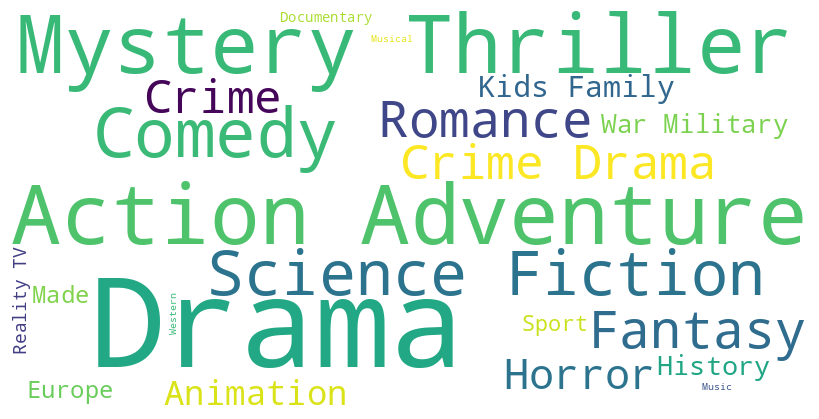

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud, STOPWORDS                    #importing stopwords from wordcloud
import matplotlib.pyplot as plt                               #importing matplotlib for plotting

# Combine genre counts from movies and TV shows
all_genres_combined = pd.concat([pd.Series(all_genres_movie), pd.Series(all_genres_show)])
genre_counts_combined = all_genres_combined.value_counts()

# Create text from genre counts
text = " ".join(genre for genre in all_genres_combined)

# Generate word cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, min_font_size=10).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



## **Finding Predominant Streaming Service**

In [ ]:
# Handle mixed format of streaming services in movies
streaming_movie_counts = movies_df["Streaming Service"].explode().str.split(', ').explode()
streaming_movie_counts = streaming_movie_counts[streaming_movie_counts != 'None'].value_counts()
print("Streaming Movie Counts:")
print(streaming_movie_counts)

# Count the occurrences of each streaming service for shows (unchanged)
streaming_show_counts = show_df["TV shows Streaming Service"].explode().str.split(', ').explode()
streaming_show_counts = streaming_show_counts[streaming_show_counts != 'None'].value_counts()
print("\nStreaming Show Counts:")
print(streaming_show_counts)

Streaming Movie Counts:
Streaming Service
netflix          38
jiocinema        17
hotstar           6
sonyliv           4
crunchyroll       4
altbalaji         3
zee5              3
lionsgateplay     2
Name: count, dtype: int64

Streaming Show Counts:
TV shows Streaming Service
netflix          38
jiocinema        17
hotstar           6
sonyliv           4
crunchyroll       4
altbalaji         3
zee5              3
lionsgateplay     2
Name: count, dtype: int64


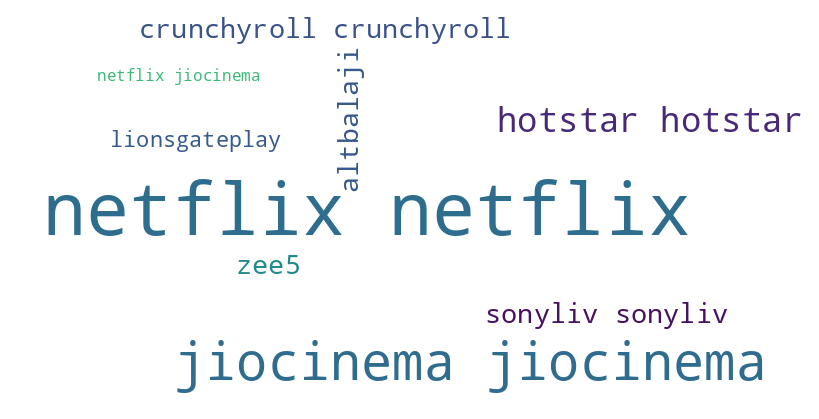

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine movie and show streaming counts
all_streaming_counts = pd.concat([streaming_movie_counts, streaming_show_counts])

# Create text from streaming counts (weighted by frequency)
text = " ".join([service for service, count in all_streaming_counts.items() for _ in range(count)])

# Generate word cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, min_font_size=10).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
movies_df.to_csv('Final Movies Data.csv', index=False)
show_df.to_csv('Final Shows Data.csv', index=False)



In [ ]:
# Filter movies, handling None values
filtered_movies = movies_df[movies_df['Genre'].apply(lambda x: 'Drama' in x.lower() if x is not None else False)]

# Filter shows, handling None values
filtered_shows = show_df[show_df['TV shows Genre'].apply(lambda x: 'Drama' in x.lower() if x is not None else False)]

filtered_movies.to_csv('Filter Movies Data.csv', index=False)
filtered_shows.to_csv('Filter Shows Data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***